In [1]:
import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
import tensorflow_datasets as tfds

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', split=(tfds.Split.TRAIN, tfds.Split.TEST), with_info=True, as_supervised=True)
encoder = info.features['text'].encoder

: 

In [ ]:
padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

: 

In [ ]:
embedding_dim = 16
model = keras.Sequential([layers.Embedding(encoder.vocab_size, embedding_dim), layers.GlobalAveragePooling1D(), layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

: 

In [ ]:
history = model.fit(train_batches, epochs=10, validation_data=test_batches, validation_steps=20)

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

Epoch 1/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6342 - accuracy: 0.6906 - val_loss: 0.5627 - val_accuracy: 0.7600
Epoch 2/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.4610 - accuracy: 0.8398 - val_loss: 0.3872 - val_accuracy: 0.8550
Epoch 3/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3583 - accuracy: 0.8794 - val_loss: 0.3817 - val_accuracy: 0.8450
Epoch 4/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.3066 - accuracy: 0.8968 - val_loss: 0.3422 - val_accuracy: 0.8750
Epoch 5/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2722 - accuracy: 0.9080 - val_loss: 0.3322 - val_accuracy: 0.8750
Epoch 6/10
2500/2500 [==============================] - 11s 5ms/step - loss: 0.2480 - accuracy: 0.9154 - val_loss: 0.3796 - val_accuracy: 0.8650
Epoch 7/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2276 - accuracy: 0.9228 - val_loss: 0.3445 - val_ac

: 

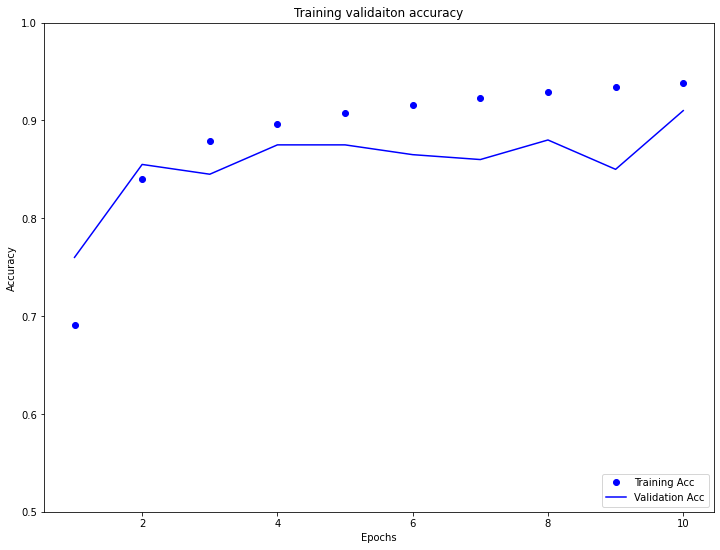

: 

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title("Training validaiton accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

: 